## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import CSV Data

Importing into a pandas data frame and clean data if necessary

In [35]:
df = pd.read_csv('./Data_Schema_Format.csv')

Fix potential encoding issue with accented characters and consolidate to a single "QUÉBEC" label(replacing QUEBEC)

In [39]:
df['location'] = df['location'].apply(lambda x: x.replace('Ã‰', 'É'))
df['province'] = df['province'].apply(lambda x: x.replace('QUEBEC', 'QUÉBEC'))

In [40]:
df['province'].unique()

array(['ONTARIO', 'ALBERTA', 'QUÉBEC', 'MANITOBA', 'NOVA SCOTIA',
       'BRITISH COLUMBIA', 'PRINCE EDWARD ISLAND',
       'NORTHWEST TERRITORIES', 'YUKON', 'NEW BRUNSWICK', 'SASKATCHEWAN'],
      dtype=object)

## Visualize High-level Database Statistics

#### Plot distribution of houses by vintage in DB

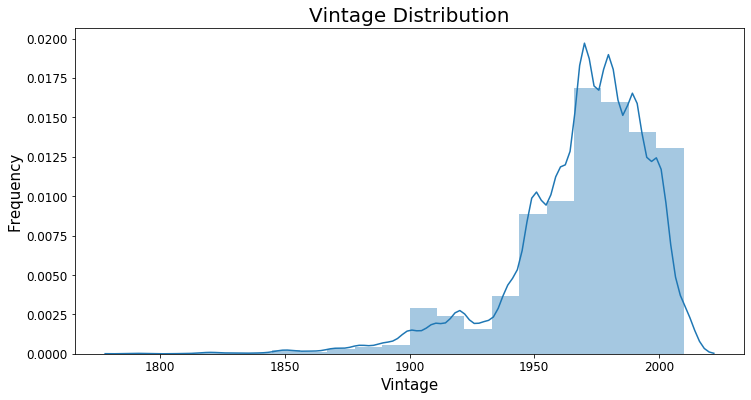

In [31]:
plt.figure(figsize=(12,6))
vintagePlt = sns.distplot(df['decade'],bins=20)

vintagePlt.axes.set_title('Vintage Distribution',fontsize=20)
vintagePlt.set_xlabel('Vintage',fontsize=15)
vintagePlt.set_ylabel('Frequency',fontsize=15)
vintagePlt.tick_params(labelsize=12)

plt.show()

#### View counts of storeys by province

In [83]:
df.groupby('province')['storeys'].value_counts().unstack().fillna(0)

storeys,One and a half,One storey,Split entry/Raised base.,Split level,Three storeys,Two and a half,Two storeys
province,,,,,,,
ALBERTA,4.0,364.0,4.0,23.0,0.0,0.0,346.0
BRITISH COLUMBIA,12.0,207.0,1.0,5.0,27.0,2.0,360.0
MANITOBA,3.0,101.0,1.0,0.0,0.0,0.0,62.0
NEW BRUNSWICK,19.0,180.0,8.0,4.0,3.0,0.0,69.0
NORTHWEST TERRITORIES,1.0,19.0,0.0,2.0,5.0,0.0,26.0
NOVA SCOTIA,16.0,356.0,13.0,2.0,3.0,3.0,97.0
ONTARIO,49.0,653.0,5.0,16.0,41.0,2.0,1587.0
PRINCE EDWARD ISLAND,3.0,102.0,1.0,1.0,2.0,0.0,25.0
QUÉBEC,27.0,620.0,5.0,7.0,42.0,1.0,942.0


#### Narrow in on a province to view storeys distribution by location

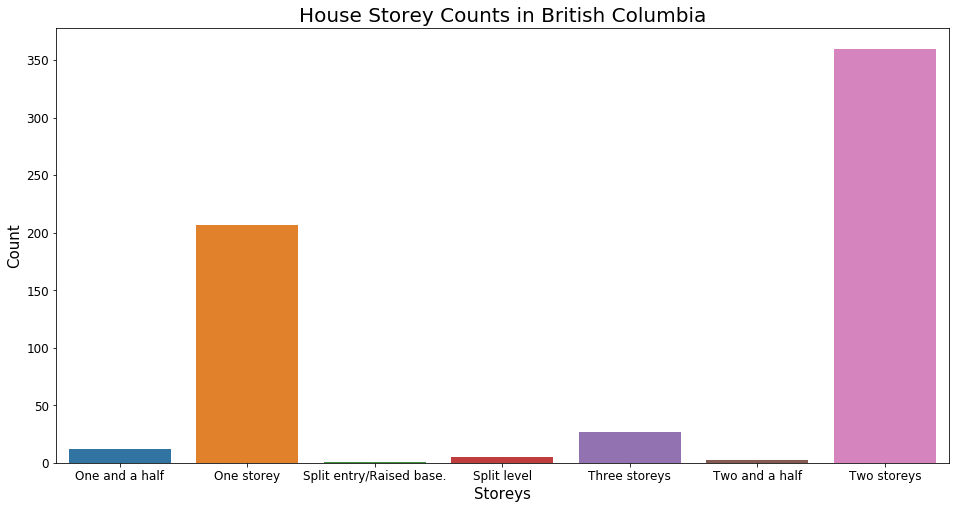

In [32]:
plt.figure(figsize=(16,8))
bcStoreysPlt = sns.barplot(data=df[df['province'] == 'BRITISH COLUMBIA']
                           .groupby('province')['storeys'].value_counts().unstack())

bcStoreysPlt.axes.set_title('House Storey Counts in British Columbia',fontsize=20)
bcStoreysPlt.set_xlabel('Storeys',fontsize=15)
bcStoreysPlt.set_ylabel('Count',fontsize=15)
bcStoreysPlt.tick_params(labelsize=12)

plt.show()

#### Investigate house sizes in different Albertan cities (using above grade floor area as the metric of size)

In [81]:
df[df['province'] == 'ALBERTA'].groupby('location')['agFloorArea'].describe().fillna(0)

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
CALGARY,1.0,99.600000,0.000000,99.6,99.600,99.6,99.600,99.6
CALGARY INTL,128.0,149.823438,59.833878,39.7,109.175,140.0,181.325,421.0
COLD LAKE,11.0,89.927273,17.879938,49.5,84.550,95.6,97.550,111.4
EDMONTON INTL,551.0,140.261343,53.391079,30.4,100.200,127.4,166.700,355.1
LETHBRIDGE,11.0,109.927273,28.547367,67.6,96.900,108.5,122.800,170.2
MEDICINE HAT,13.0,107.746154,27.118616,80.4,87.200,94.9,124.300,162.6
PEACE RIVER,17.0,101.929412,13.680039,76.1,94.400,99.7,105.600,133.0
RED DEER,1.0,116.300000,0.000000,116.3,116.300,116.3,116.300,116.3
RED DEER REGIONAL,7.0,145.400000,33.462068,100.3,118.150,159.9,167.300,186.7


### Investigate main wall insulation by decade in Ontario from 1900 onwards

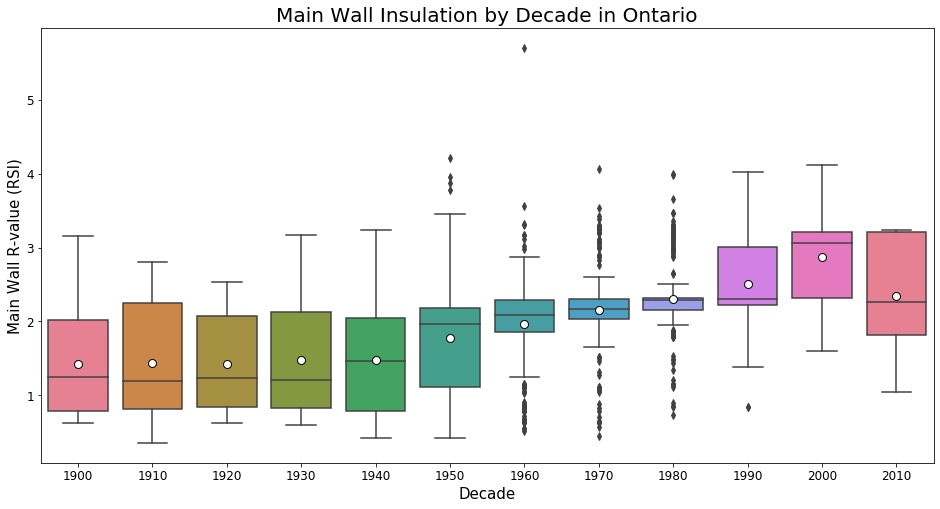

In [54]:
on1900Df = df[(df['province'] == 'ONTARIO') & (df['decade'] >= 1900)]

plt.figure(figsize=(16, 8))
wallRValPlt = sns.boxplot(
    x = 'decade', 
    y = 'dominantWallRVal', 
    data = on1900Df,
    palette = sns.color_palette('husl',11),
    showfliers = True,
    whis = 1.5,
    showmeans=True,
    meanprops={
        'marker':'o', 
        'markerfacecolor':'white', 
        'markeredgecolor':'black', 
        'markersize':8
    }
)



wallRValPlt.axes.set_title("Main Wall Insulation by Decade in Ontario",fontsize=20)
wallRValPlt.set_xlabel("Decade",fontsize=15)
wallRValPlt.set_ylabel("Main Wall R-value (RSI)",fontsize=15)
wallRValPlt.tick_params(labelsize=12)
plt.show()

#### Display descriptive statistics of the above plot

In [59]:
on1900Df.groupby('decade')['dominantWallRVal'].describe()

,count,mean,std,min,25%,50%,75%,max
decade,,,,,,,,
1900,42.0,1.424043,0.688262,0.632200,0.790700,1.253900,2.024375,3.155900
1910,30.0,1.442526,0.746388,0.354567,0.818450,1.194000,2.253750,2.805400
1920,72.0,1.425695,0.618431,0.625800,0.846900,1.230563,2.075900,2.528933
1930,54.0,1.475371,0.726132,0.604100,0.824600,1.201050,2.129175,3.168200
1940,107.0,1.471816,0.698337,0.420000,0.790700,1.470500,2.053000,3.243050
1950,212.0,1.772815,0.720409,0.420000,1.113000,1.964358,2.175900,4.205500
1960,276.0,1.959957,0.607507,0.514200,1.856775,2.084250,2.290150,5.704200
1970,415.0,2.160800,0.414563,0.443800,2.030150,2.173200,2.298200,4.066350
1980,416.0,2.301631,0.403005,0.727300,2.150300,2.289400,2.312075,3.990000


#### Alternative way to visualize wall R-value by vintage in Ontario

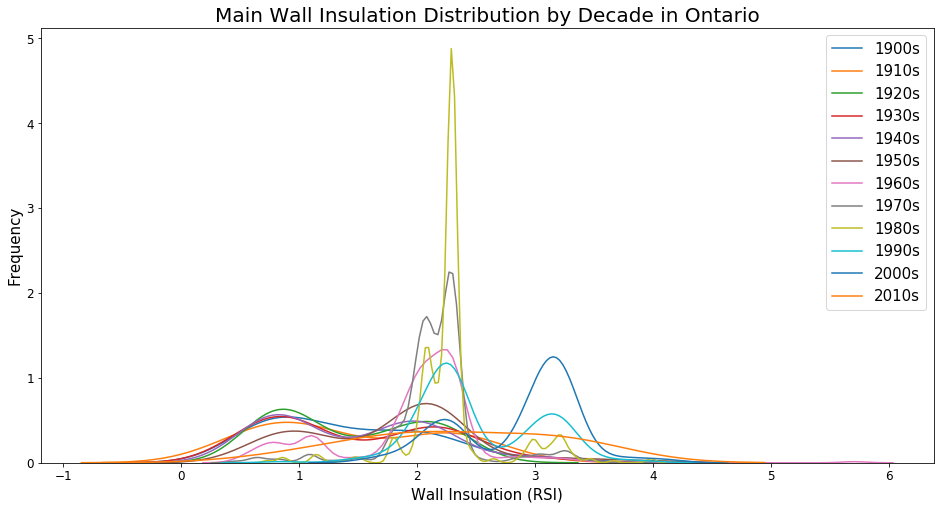

In [68]:
plt.figure(figsize=(16, 8))
for decade in sorted(on1900Df['decade'].unique()):
    wallDistPlt = sns.distplot(
        on1900Df[on1900Df['decade'] == decade][['dominantWallRVal']], 
        hist=False, 
        label = f'{decade}s'
    )
    
wallDistPlt.axes.set_title("Main Wall Insulation Distribution by Decade in Ontario",fontsize=20)
wallDistPlt.set_xlabel("Wall Insulation (RSI)",fontsize=15)
wallDistPlt.set_ylabel("Frequency",fontsize=15)
wallDistPlt.legend(fontsize=15)
wallDistPlt.tick_params(labelsize=12)

### Investigate airtightness over time in British Columbia

In [111]:
bc1900Df = df[(df['province'] == 'BRITISH COLUMBIA') & (df['decade'] >= 1900)]

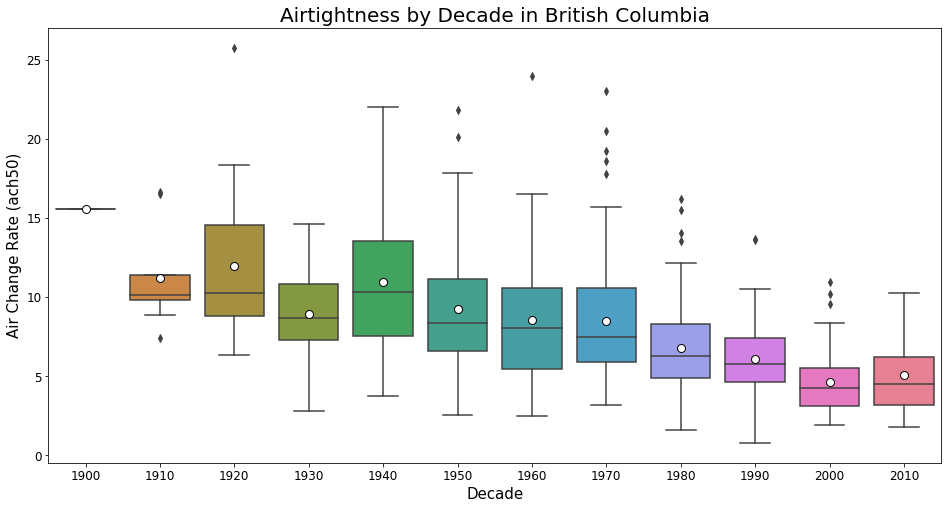

In [112]:
plt.figure(figsize=(16, 8))
achBcPlt = sns.boxplot(
    x = 'decade', 
    y = 'ach', 
    data = bc1900Df,
    palette = sns.color_palette('husl',11),
    showfliers = True,
    whis = 1.5,
    showmeans=True,
    meanprops={
        'marker':'o', 
        'markerfacecolor':'white', 
        'markeredgecolor':'black', 
        'markersize':8
    }
)

achBcPlt.axes.set_title("Airtightness by Decade in British Columbia",fontsize=20)
achBcPlt.set_xlabel("Decade",fontsize=15)
achBcPlt.set_ylabel("Air Change Rate (ach50)",fontsize=15)
achBcPlt.tick_params(labelsize=12)

#### Get table of descriptive statistics of the above plot

In [113]:
bc1900Df.groupby('decade')['ach'].describe()

,count,mean,std,min,25%,50%,75%,max
decade,,,,,,,,
1900,1.0,15.593900,NaN,15.5939,15.593900,15.59390,15.593900,15.5939
1910,9.0,11.239222,3.224092,7.4031,9.833100,10.12240,11.391300,16.6710
1920,14.0,11.974821,5.415447,6.3277,8.828225,10.23540,14.580000,25.7727
1930,10.0,8.945330,3.198156,2.7851,7.289475,8.66375,10.803675,14.6059
1940,27.0,10.952052,4.307555,3.7584,7.569000,10.35230,13.552950,22.0131
1950,36.0,9.263697,4.135616,2.5787,6.615675,8.35670,11.175500,21.8485
1960,52.0,8.582256,4.007352,2.4692,5.441825,8.02935,10.601650,23.9705
1970,126.0,8.525950,3.735383,3.1921,5.908375,7.50515,10.573050,23.0376
1980,137.0,6.810841,2.675818,1.6228,4.873500,6.26890,8.282800,16.1871


#### Alternative way to visualize wall ACH by vintage in British Columbia

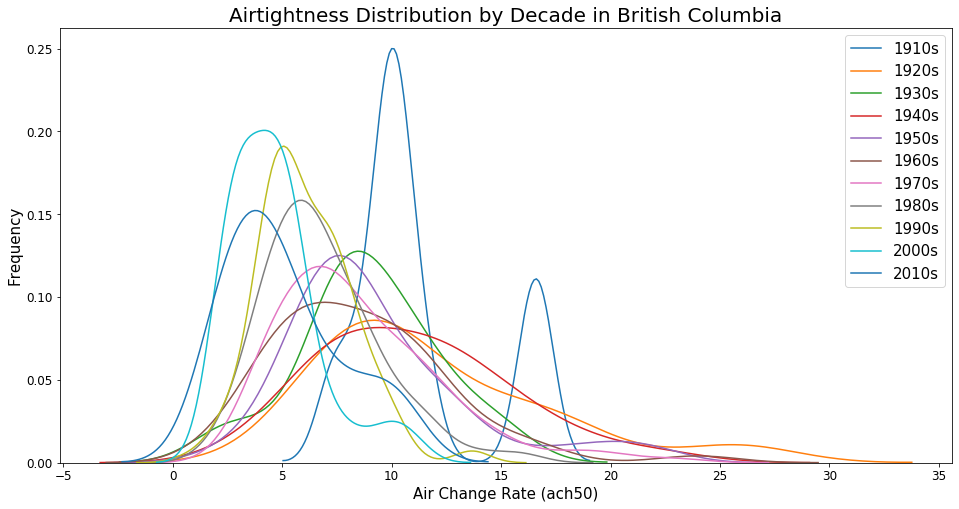

In [79]:
plt.figure(figsize=(16, 8))
for decade in sorted(bc1900Df['decade'].unique()):
    if len(bc1900Df[bc1900Df['decade'] == decade][['ach']]) < 2:
        continue
    achDistPlt = sns.distplot(
        bc1900Df[bc1900Df['decade'] == decade][['ach']], 
        hist=False, 
        label = f'{decade}s'
    )
    
achDistPlt.axes.set_title("Airtightness Distribution by Decade in British Columbia",fontsize=20)
achDistPlt.set_xlabel("Air Change Rate (ach50)",fontsize=15)
achDistPlt.set_ylabel("Frequency",fontsize=15)
achDistPlt.legend(fontsize=15)
achDistPlt.tick_params(labelsize=12)

### Investigate Mechanical Systems

In [104]:
df.groupby('province')['spaceHeatingFuel'].value_counts().unstack().fillna(0)

spaceHeatingFuel,Electric,Hardwood,Mixed Wood,Natural gas,Oil,Propane,Softwood,Wood Pellets
province,,,,,,,,
ALBERTA,2.0,0.0,0.0,722.0,0.0,17.0,0.0,0.0
BRITISH COLUMBIA,267.0,0.0,1.0,342.0,4.0,0.0,0.0,0.0
MANITOBA,37.0,0.0,0.0,130.0,0.0,0.0,0.0,0.0
NEW BRUNSWICK,248.0,0.0,12.0,1.0,21.0,0.0,0.0,1.0
NORTHWEST TERRITORIES,1.0,0.0,0.0,1.0,42.0,9.0,0.0,0.0
NOVA SCOTIA,308.0,3.0,34.0,0.0,143.0,1.0,0.0,1.0
ONTARIO,185.0,2.0,16.0,2030.0,71.0,48.0,0.0,1.0
PRINCE EDWARD ISLAND,39.0,0.0,3.0,0.0,89.0,3.0,0.0,0.0
QUÉBEC,1431.0,1.0,58.0,73.0,80.0,0.0,0.0,1.0


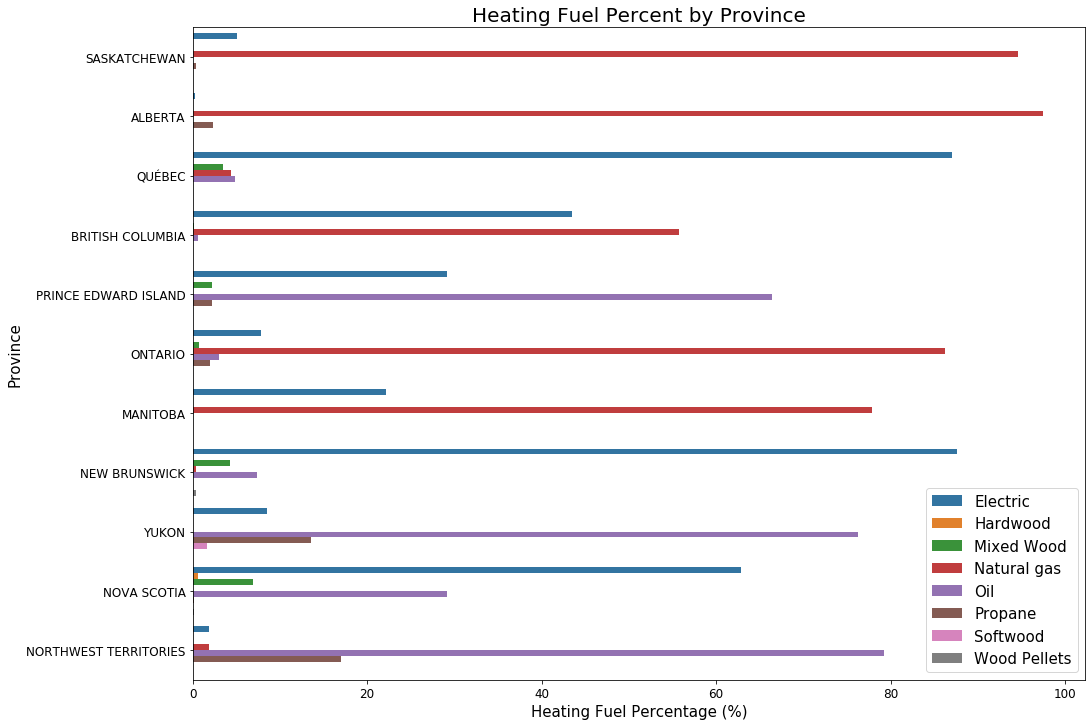

In [119]:
plt.figure(figsize=(16, 12))
heatingFuelDf = (df.groupby(['province'])['spaceHeatingFuel']
                    .value_counts(normalize=True)
                    .rename('percentage')
                    .mul(100)
                    .reset_index()
                    .sort_values('spaceHeatingFuel'))

heatingFuelPlt = sns.barplot(x='percentage', y='province', data=heatingFuelDf, hue='spaceHeatingFuel')
heatingFuelPlt.axes.set_title("Heating Fuel Percent by Province",fontsize=20)
heatingFuelPlt.set_xlabel("Heating Fuel Percentage (%)",fontsize=15)
heatingFuelPlt.set_ylabel("Province",fontsize=15)
heatingFuelPlt.legend(fontsize=15)
heatingFuelPlt.tick_params(labelsize=12)